In [208]:
import numpy as np 
from utils import LoadDataset

users = LoadDataset('ml-100k/u.data', sep='\t').data


In [209]:
mean_rating = users[:,2].mean()
std_rating = users[:,2].std()
var_rating = users[:,2].var()
print(f"{mean_rating}, {std_rating}, {var_rating} are the values for mean, standard deviation and variance respectively")

3.52986, 1.1256679707622492, 1.2671283804 are the values for mean, standard deviation and variance respectively


In [210]:


for i in range(1, len(np.unique(users[:,0]))+1):
    hor_stack = np.array([i])
    hor_stack = np.hstack((hor_stack,users[users[:,0]==i][:,2].mean()))
    hor_stack = np.hstack((hor_stack,users[users[:,0]==i][:,2].std()))
    hor_stack = np.hstack((hor_stack,users[users[:,0]==i][:,2].var()))
    if i == 1:
        stack = hor_stack.reshape(1,-1)
    else:
        stack = np.vstack((stack, hor_stack.reshape(1,-1) ))

In [211]:
mean_rating = stack[:, 1].mean()
std_rating = stack[:, 1].std()

In [212]:
stack_by_mean = np.hstack((stack, np.abs(stack[:,1].reshape(-1,1) - mean_rating)))
sorted_by_mean_distance = stack[np.argsort(stack_by_mean[:,4])]


In [213]:
stack[np.argsort(stack[:,3])][-10:,:]

array([[739.        ,   3.6       ,   1.51563282,   2.29714286],
       [199.        ,   2.95      ,   1.54838626,   2.3975    ],
       [219.        ,   3.71428571,   1.55511008,   2.41836735],
       [174.        ,   3.5819209 ,   1.57139354,   2.46927767],
       [179.        ,   3.04761905,   1.57287091,   2.4739229 ],
       [ 68.        ,   3.02941176,   1.58086525,   2.49913495],
       [ 38.        ,   3.71900826,   1.59141883,   2.53261389],
       [531.        ,   3.23333333,   1.62651639,   2.64555556],
       [762.        ,   3.04761905,   1.64682062,   2.71201814],
       [609.        ,   2.39285714,   1.7183731 ,   2.95280612]])

In [214]:
sorted_by_std_distance = stack[stack[:,1] - mean_rating <= -std_rating]
sorted_by_std_distance = np.vstack((sorted_by_std_distance, stack[stack[:,1] - mean_rating >= std_rating]))



In [215]:
sorted_by_std_distance

array([[3.00000000e+00, 2.79629630e+00, 1.20768572e+00, 1.45850480e+00],
       [5.00000000e+00, 2.87428571e+00, 1.35906330e+00, 1.84705306e+00],
       [1.30000000e+01, 3.09748428e+00, 1.41530047e+00, 2.00307543e+00],
       ...,
       [9.39000000e+02, 4.26530612e+00, 9.64164229e-01, 9.29612661e-01],
       [9.41000000e+02, 4.04545455e+00, 8.77873087e-01, 7.70661157e-01],
       [9.42000000e+02, 4.26582278e+00, 7.58226791e-01, 5.74907867e-01]])

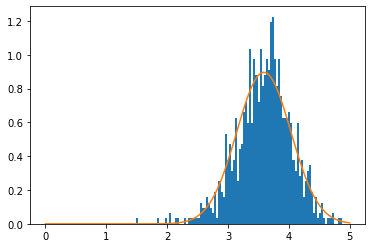

In [217]:
import matplotlib.pyplot as plt 
import scipy.stats as stats

x = plt.hist(stack[:,1], bins=100, density=True)
plt.plot(np.linspace(0,5, num=100),stats.norm.pdf(np.linspace(0,5, num=100), mean_rating, std_rating))

In [201]:
users[:,2]

array([3, 3, 1, ..., 1, 2, 3])

In [198]:
stack[:]

array([[1.00000000e+00, 3.61029412e+00, 1.26125984e+00, 1.59077638e+00],
       [2.00000000e+00, 3.70967742e+00, 1.02212771e+00, 1.04474506e+00],
       [3.00000000e+00, 2.79629630e+00, 1.20768572e+00, 1.45850480e+00],
       ...,
       [9.41000000e+02, 4.04545455e+00, 8.77873087e-01, 7.70661157e-01],
       [9.42000000e+02, 4.26582278e+00, 7.58226791e-01, 5.74907867e-01],
       [9.43000000e+02, 3.41071429e+00, 1.25513401e+00, 1.57536139e+00]])

In [102]:
 (np.sum(x[0] * np.diff(x[1])) == 1)

True

In [2]:
import pandas as pd 

header='user id | item id | rating | timestamp'.split(' | ')

data = pd.read_csv('ml-100k/u.data', names=header, sep='\t',)

In [11]:
print(data['rating'].mean(),data['rating'].std(),data['rating'].var())

3.52986 1.125673599144129 1.267141051810097


In [20]:
feature = pd.DataFrame(index=range(1,944), columns=range(1, 1683))

In [26]:
for idx, row in data.iterrows():
    id, item, rate, timestamp = row
    feature[item][id] = rate

In [28]:
feature.mean(axis=1)


1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Length: 943, dtype: float64

In [34]:
feature.var(axis=1).sort_values()

849    0.118577
355    0.233846
477    0.255462
469    0.302326
33     0.302536
         ...   
38     2.553719
68     2.574866
531    2.736782
762    2.847619
609    3.062169
Length: 943, dtype: float64

In [3]:
header ='movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Childrens | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'.split(' | ')

movies = pd.read_csv('ml-100k/u.item', names=header, sep='|')

In [110]:
condensed = movies.loc[:, "movie id":"IMDb URL"]
genre_list = movies.loc[:, "unknown":] == 1
cond_genre = pd.Series([", ".join(genre_list.keys()[bag_of_genre]) for _, bag_of_genre in genre_list.iterrows()])
condensed['genre'] = cond_genre

In [123]:
total_rating = data.groupby(by=['item id'], as_index=False).count()['rating']
sum_rainting = data.groupby(by=['item id'], as_index=False).sum()['rating']
mean_rating = data.groupby(by=['item id'], as_index=False).mean()['rating']
max_rating = data.groupby(by=['item id'], as_index=False).max()['rating']
min_rating = data.groupby(by=['item id'], as_index=False).min()['rating']
std_rating = data.groupby(by=['item id'], as_index=False).std()['rating']
var_rating = data.groupby(by=['item id'], as_index=False).var()['rating']

condensed['total'] = total_rating
condensed['sum'] = sum_rainting
condensed['mean'] = mean_rating
condensed['max'] = max_rating
condensed['min'] = min_rating
condensed['std'] = std_rating
condensed['var'] = var_rating

In [135]:
condensed

,movie id,movie title,release date,video release date,IMDb URL,genre,total,sum,mean,max,min,std,var
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,"Animation, Childrens, Comedy",452,1753,3.878319,5,1,0.927897,0.860992
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,"Action, Adventure, Thriller",131,420,3.206107,5,1,0.966497,0.934116
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,Thriller,90,273,3.033333,5,1,1.212760,1.470787
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,"Action, Comedy, Drama",209,742,3.550239,5,1,0.965069,0.931358
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),"Crime, Drama, Thriller",86,284,3.302326,5,1,0.946446,0.895759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,Drama,1,1,1.000000,1,1,NaN,NaN
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,"Romance, Thriller",1,3,3.000000,3,3,NaN,NaN
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),"Drama, Romance",1,2,2.000000,2,2,NaN,NaN
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,Comedy,1,3,3.000000,3,3,NaN,NaN
